# 🌳 Visualización de Resultados de GridSearchCV con Nombres Originales

Este notebook contiene un gráfico de líneas para visualizar los resultados de una búsqueda de hiperparámetros (GridSearch) de un modelo de Machine Learning, utilizando los nombres originales de las columnas.

In [73]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Configuraciones adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Librerías importadas correctamente.")

✅ Librerías importadas correctamente.


In [74]:
# Cargar y preparar los datos
df = pd.read_csv('prediccion_pobreza_peru.csv')

# Separar variables predictoras y objetivo
X = df.drop(['PobrezaMonetaria', 'IngresoMensualHogar', 'GastoMensualHogar'], axis=1)
y = df['PobrezaMonetaria']

# Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Crear el pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
pipeline_final = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

print("✅ Datos preparados y pipeline creado.")

✅ Datos preparados y pipeline creado.


In [75]:
# Definir la rejilla de hiperparámetros
param_grid = {
    'classifier__n_estimators': [150, 250, 300],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_leaf': [1, 4, 15, 30],


    




}

# Configurar y ejecutar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_final,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n✅ Búsqueda completada.")
print("La mejor configuración de hiperparámetros es:")
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Búsqueda completada.
La mejor configuración de hiperparámetros es:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 150}


## 📊 Gráfico de Líneas de Resultados de GridSearchCV

Este gráfico muestra cómo varía el rendimiento (R2/Accuracy) del modelo según los diferentes hiperparámetros:
- **Eje X**: nodesize
- **Eje Y**: R2
- **Color de línea**: pmtry
- **Forma de marcador**: ntree

In [76]:
rosas = [
    "#FFC0CB", # Light Pink
    "#FF69B4", # Hot Pink
    "#8B008B"  # Dark Magenta
]


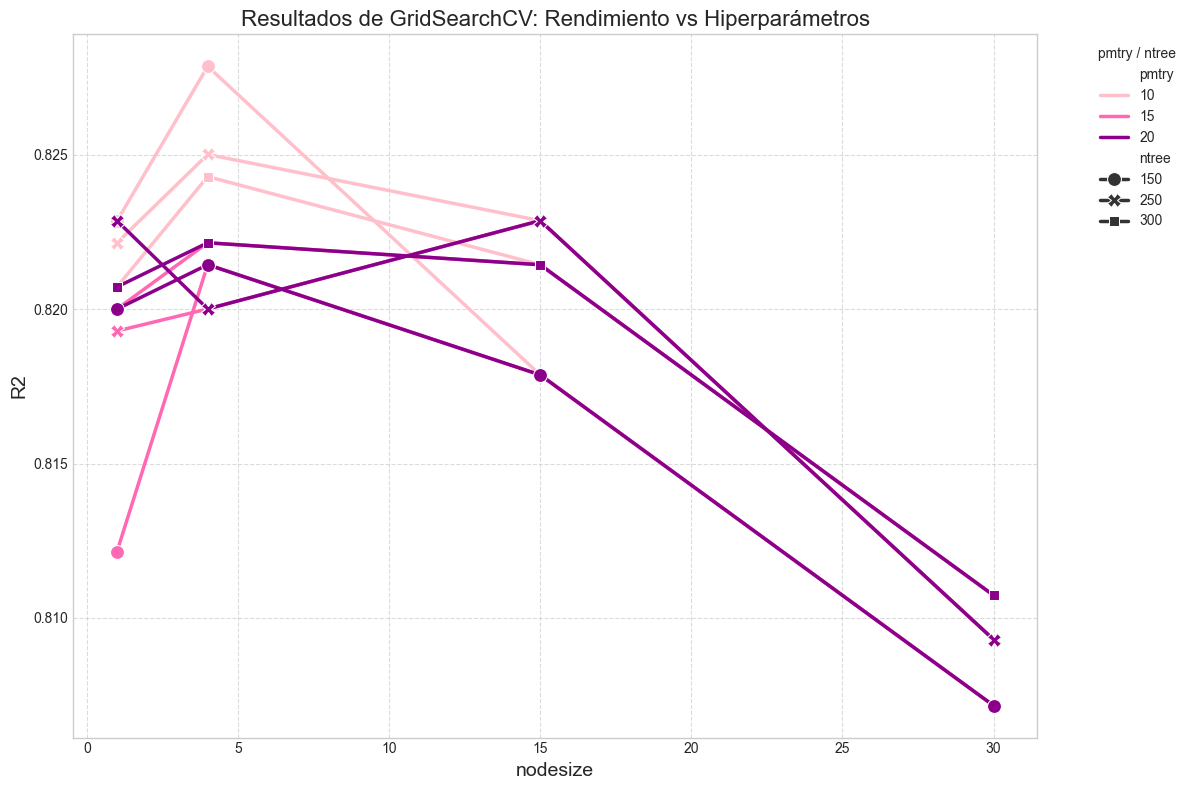

In [77]:
# Extraemos los resultados de GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Creamos un DataFrame con las columnas necesarias usando los nombres originales
# Mapeamos los parámetros de Random Forest a los nombres originales solicitados
plot_data = pd.DataFrame({
    'nodesize': results['param_classifier__min_samples_leaf'],
    'R2': results['mean_test_score'],
    'pmtry': results['param_classifier__max_depth'],
    'ntree': results['param_classifier__n_estimators']
})

# Convertimos los valores None a una representación numérica para el gráfico
plot_data['pmtry'] = plot_data['pmtry'].fillna(30)  # Usamos 30 para representar None (sin límite)

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 8))

# Usamos seaborn lineplot con los parámetros especificados
ax = sns.lineplot(
    data=plot_data,
    x='nodesize',
    y='R2',
    hue='pmtry',
    style='ntree',
    markers=True,
    dashes=False,
    palette=rosas,
    markersize=10,
    linewidth=2.5
)

# Configuramos las etiquetas de los ejes
plt.xlabel('nodesize', fontsize=14)
plt.ylabel('R2', fontsize=14)

# Configuramos el título
plt.title('Resultados de GridSearchCV: Rendimiento vs Hiperparámetros', fontsize=16)

# Mejoramos la leyenda
handles, labels = ax.get_legend_handles_labels()
# Modificamos las etiquetas para mostrar None en lugar de 30
labels = ['None' if label == '30' else label for label in labels]
ax.legend(handles, labels, title='pmtry / ntree', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustamos el layout para evitar que la leyenda se corte
plt.tight_layout()

# Guardamos el gráfico
plt.savefig('gridsearch_lineas_nombres_originales.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
# Mostramos una tabla con los datos utilizados para el gráfico
print("Datos utilizados para el gráfico:")
display(plot_data.sort_values(['pmtry', 'ntree', 'nodesize']))

Datos utilizados para el gráfico:


,nodesize,R2,pmtry,ntree
0,1,0.822861,10,150
3,4,0.827870,10,150
6,15,0.817872,10,150
9,30,0.807153,10,150
1,1,0.822152,10,250
4,4,0.825015,10,250
7,15,0.822870,10,250
10,30,0.809295,10,250
2,1,0.820724,10,300
5,4,0.824298,10,300
